In [1]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

In [30]:
DATA_PATH = r"C:\Users\eatb6\Documents\ML\Final Project\ML2021BigProject-main\ML2021BigProject-main\Code\data_10.json"


In [33]:
def load_data(data_path):
    """Loads training dataset from json file.
        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y

NameError: name 'data' is not defined

In [144]:
def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    plt.tight_layout()
    plt.savefig('Accuracy.pdf')
    # create error sublpot
    #axs[1].plot(history.history["loss"], label="train error")
    #axs[1].plot(history.history["val_loss"], label="test error")
    #axs[1].set_ylabel("Error")
    #axs[1].set_xlabel("Epoch")
    #axs[1].legend(loc="upper right")
    #axs[1].set_title("Error eval")
    #plt.tight_layout()
    #plt.savefig('Confusion Matrix.pdf')
    plt.show()

In [5]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.
    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split
    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


In [148]:
def build_model(input_shape):
    """Generates CNN model
    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(224, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(224, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    #model.add(keras.layers.Dense(32, activation='relu'))
    #model.add(keras.layers.Dropout(0.1))
    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model

In [73]:
def predict(model, X, y):
    """Predict a single sample using the trained model
    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


In [149]:
 X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.2, 0.2)

# create network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
model = build_model(input_shape)

# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()




Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 11, 224)      2240      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 6, 224)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 64, 6, 224)        896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 62, 4, 224)        451808    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 31, 2, 224)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 31, 2, 224)        896       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 30, 1, 32)        

Target: 6, Predicted label: [8]


In [ ]:
# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

# plot accuracy/error for training and validation
plot_history(history)

# evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/30
200/200 [==============================] - 61s 306ms/step - loss: 1.9831 - accuracy: 0.3296 - val_loss: 1.5397 - val_accuracy: 0.4600
Epoch 2/30
200/200 [==============================] - 59s 297ms/step - loss: 1.4917 - accuracy: 0.4833 - val_loss: 1.2830 - val_accuracy: 0.5325
Epoch 3/30
200/200 [==============================] - 59s 294ms/step - loss: 1.3143 - accuracy: 0.5422 - val_loss: 1.1751 - val_accuracy: 0.5888
Epoch 4/30
200/200 [==============================] - 59s 293ms/step - loss: 1.1795 - accuracy: 0.5836 - val_loss: 1.0906 - val_accuracy: 0.6137
Epoch 5/30
200/200 [==============================] - 60s 301ms/step - loss: 1.0869 - accuracy: 0.6162 - val_loss: 1.1292 - val_accuracy: 0.6062
Epoch 6/30
200/200 [==============================] - 63s 314ms/step - loss: 1.0141 - accuracy: 0.6528 - val_loss: 0.9853 - val_accuracy: 0.6513
Epoch 7/30
200/200 [==============================] - 64s 321ms/step - loss: 0.9100 - accuracy: 0.6845 - val_loss: 0.9123 - val_ac

In [136]:

prediction=model.predict(X_test)
predicted_index = np.argmax(prediction, axis=1)
predicted_index

array([0, 4, 6, ..., 4, 6, 2], dtype=int64)

In [62]:
from sklearn.metrics import plot_confusion_matrix

In [137]:
from sklearn.metrics import confusion_matrix



array=confusion_matrix(y_test, predicted_index)


In [103]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [124]:
genres = {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 
          'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

In [128]:
import itertools
from collections import OrderedDict

Normalized confusion matrix


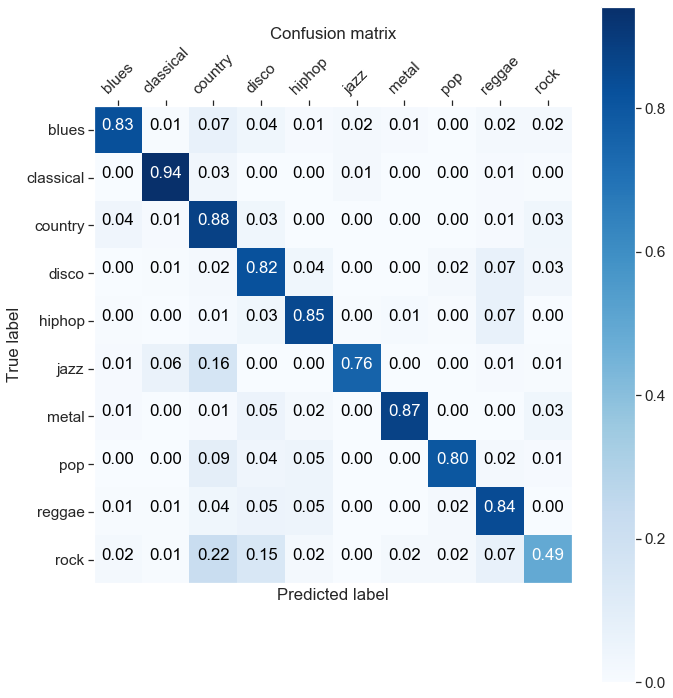

In [143]:
keys = OrderedDict(sorted(genres.items(), key=lambda t: t[1])).keys()
plt.figure(figsize=(10,10))
plot_confusion_matrix(array, keys, normalize=True)
plt.grid(None)
plt.tick_params(bottom=False, top=True, left=True, right=False)
plt.tick_params(labelbottom=False, labeltop=True, labelleft=True, labelright=False)
plt.tight_layout()
plt.savefig('Confusion Matrix.pdf')